<a href="https://colab.research.google.com/github/kotharisanjana/CMPE258_DeepLearning_Spring2023/blob/main/Assignment_3/a_NN_Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Write  a colab in numpy only from scratch 3 layer deep neural network for non linear regression . Use proper non linear activation functions and proper number of hidden layer neurons - show the results / loss and epochs training and final output . You will be doing manual backprop and chain rule based gradient propagation.**

In [1]:
# Imports

import numpy as np
from typing import Callable
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Generate non-linear data

n = 500
dim = 3
x = np.random.uniform(-1, 1, (n, dim))
print('Input shape =', x.shape)

Input shape = (500, 3)


In [3]:
# Initialize weights and bias

weights = np.array([[2, -3, 6]]).T
bias = np.array([8])
print('Weights shape =', weights.shape)
print('Bias shape =', bias.shape)

# non-linear 3 variable function we want to learn
y_true = np.einsum('ij, jk -> ik', (x**2),  weights) + np.einsum('ij, jk -> ik', x, weights) + bias
print('Function output shape =', y_true.shape)

Weights shape = (3, 1)
Bias shape = (1,)
Function output shape = (500, 1)


In [4]:
# Hyperparamter initializations

input_dim = dim
output_dim = 1
hidden_dim = 16

learning_rate = 0.01
num_epochs = 50

In [5]:
# Linear layer class

class Linear:
  def __init__(self, input_dim, output_dim):
    self.weights = np.random.randn(input_dim, output_dim) * np.sqrt(2.0/input_dim)
    self.bias = np.zeros(output_dim)

  def __call__(self, x):
    self.x = x
    return np.einsum('ij, jk -> ik', x, self.weights) + self.bias

  def backward(self, gradient):
    self.weights_gradient = np.einsum('ij, jk -> ik', self.x.T, gradient) #self.x.T @ gradient
    self.bias_gradient = gradient.sum(axis=0)
    self.x_gradient = np.einsum('ij, jk -> ik', gradient, self.weights.T) #gradient @ self.weights.T
    return self.x_gradient

  def update(self, lr):
    self.weights = self.weights - (lr * self.weights_gradient)
    self.bias = self.bias - (lr * self.bias_gradient)

In [6]:
# Error function - Mean Square Error

class MeanSquareError:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((self.y_pred - self.y_true) ** 2).mean()

  def backward(self):
    self.n = self.y_true.shape[0]
     # gradient of loss function wrt y_pred
    self.gradient = (2.0 * (self.y_pred - self.y_true)) /  n
    return self.gradient

In [7]:
# Non-Linearity using ReLu

class ReLu:
  def __call__(self, input):
    self.input = input
    self.output = np.clip(self.input, 0, None)
    return self.output

  def backward(self, output_gradient):
    self.input_gradient = (self.input > 0) * output_gradient
    return self.input_gradient

In [8]:
# Non-linear model

class Model:
  def __init__(self, input_dim, output_dim , hidden_dim):
    self.linear1 = Linear(input_dim, hidden_dim)
    self.relu1 = ReLu()
    self.linear2 = Linear(hidden_dim, hidden_dim)
    self.relu2 = ReLu()
    self.linear3 = Linear(hidden_dim, output_dim)

  def __call__(self, x):
    l1 = self.linear1(x)
    r1 = self.relu1(l1)
    l2 = self.linear2(r1)
    r2 = self.relu2(l2)
    l3 = self.linear3(r2)
    return l3

  def backward(self, output_gradient):
    l3_gradient = self.linear3.backward(output_gradient)
    r2_gradient = self.relu2.backward(l3_gradient)
    l2_gradient = self.linear2.backward(r2_gradient)
    r1_gradient = self.relu1.backward(l2_gradient)
    l1_gradient = self.linear1.backward(r1_gradient)
    return l1_gradient

  def update(self, lr):
    self.linear3.update(lr)
    self.linear2.update(lr)
    self.linear1.update(lr)

In [9]:
# Traning non-linear model

loss_ = []

def fit(x, y_true, model, loss, lr, num_epochs):
  for epoch in range(num_epochs):
    y_pred = model(x)
    loss_value = loss(y_pred, y_true)
    print(f'Epoch {epoch}, loss {loss_value}')
    loss_gradient = loss.backward()
    model.backward(loss_gradient)
    model.update(lr)
    loss_.append(loss_value)
  return loss_

In [10]:
# Initialise model and loss

loss = MeanSquareError()
model = Model(input_dim, output_dim, hidden_dim)

# Train model
loss_ = fit(x, y_true, model, loss, learning_rate, num_epochs)

Epoch 0, loss 103.6252300397047
Epoch 1, loss 74.34177439227078
Epoch 2, loss 48.99141189696318
Epoch 3, loss 29.282867902875026
Epoch 4, loss 18.18686597635728
Epoch 5, loss 13.001141860070515
Epoch 6, loss 9.883137222439512
Epoch 7, loss 7.7968517924332446
Epoch 8, loss 6.408122356710914
Epoch 9, loss 5.483169991319379
Epoch 10, loss 4.859266521891936
Epoch 11, loss 4.4276541105460785
Epoch 12, loss 4.116479315321267
Epoch 13, loss 3.8842442789117313
Epoch 14, loss 3.704558460146938
Epoch 15, loss 3.5602239704458962
Epoch 16, loss 3.4399364784567443
Epoch 17, loss 3.336448129437133
Epoch 18, loss 3.2447979326753327
Epoch 19, loss 3.1632938350572304
Epoch 20, loss 3.088815576759954
Epoch 21, loss 3.019439358392752
Epoch 22, loss 2.954111620646474
Epoch 23, loss 2.892354139185681
Epoch 24, loss 2.8341832426709734
Epoch 25, loss 2.7794049110746455
Epoch 26, loss 2.727266866594832
Epoch 27, loss 2.6772837991341474
Epoch 28, loss 2.629467043005309
Epoch 29, loss 2.5832580176336837
Epoch 3

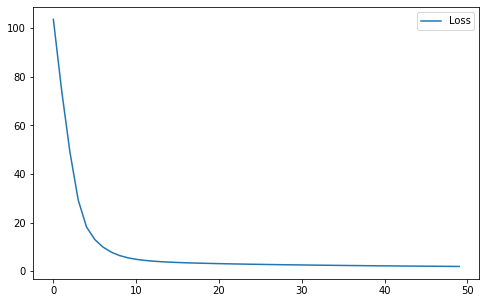

In [11]:
# Plot epoch vs loss

plt.figure(figsize=(8, 5))
plt.plot(range(num_epochs), loss_, label='Loss')
plt.legend()

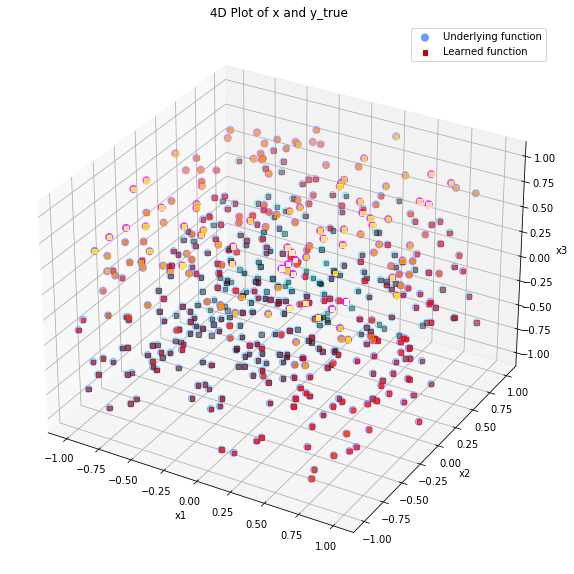

In [32]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y_true.flatten(), cmap='cool', label='Underlying function', s=50)
sc = ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=model(x), cmap='hot', label='Learned function', marker=',')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
ax.set_title('4D Plot of x and y_true')

plt.legend()
plt.show()

If zoomed into the above plot, we see that the learned function ('■') is amost overlaping with the true underlying function ('●') showing that the neural network is learning the function we are trying to model. It is also seen from the decreasing loss as the number of epochs/iterations increase.